<a href="https://colab.research.google.com/github/jmelendezgeo/Exploratory-analysis-/blob/main/EnegySupply.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction
**English**

In this notebook an exploratory analysis of various data sets is made with certain information from countries. The information will go through a Data Cleaning process to be able to unify the format in a DataFrame with which we will continue working to obtain certain insights and statistics. 

**Spanish**.

En esta libreta se hace un **análisis exploratorio** de diversos set de datos con cierta información de países. La información pasará por un proceso de **Limpieza de Datos** para poder unificar el formato en un DataFrame con el que continuaremos trabajando para obtener ciertos insights y estadísticas.

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

import warnings
warnings.filterwarnings('ignore')

## Data load & Data Cleaning

**English**

The information contained in 'Energy Indicators' corresponds to the supply of energy and production of renewable electricity of United Nations of 2013 


**Spanish**

La información contenida en 'Energy Indicators' corresponde a *Suministro de energía y producción de electricidad renovable* de [United nations](https://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) del 2013

In [3]:
#First, we are going to load the data contained in an .xls file (excel file). 
#In the file we have information in the header and in the footer so we exclude this information from our DataFrame 
Energy = pd.read_excel('Energy Indicators.xls', skiprows = 17, skipfooter = 38)
Energy.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Petajoules,Gigajoules,%
0,NaN,Afghanistan,Afghanistan,321,10,78.669280
1,NaN,Albania,Albania,102,35,100.000000
2,NaN,Algeria,Algeria,1959,51,0.551010
3,NaN,American Samoa,American Samoa,...,...,0.641026
4,NaN,Andorra,Andorra,9,121,88.695650


In [4]:
# The first two columns are unnecessary. We also need to name our columns appropriately 
Energy.drop(columns = ['Unnamed: 0','Unnamed: 1'], inplace = True)
Energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
Energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321,10,78.669280
1,Albania,102,35,100.000000
2,Algeria,1959,51,0.551010
3,American Samoa,...,...,0.641026
4,Andorra,9,121,88.695650


In [5]:
# It seems that in our Energy Supply column there is information that is not real (eg '...'). 
# When reviewing the dataset information, the '...' means no data. 
# We will use np.nan to replace these strings
~Energy.applymap(np.isreal)

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,True,False,False,False
1,True,False,False,False
2,True,False,False,False
3,True,True,True,False
4,True,False,False,False
...,...,...,...,...
222,True,False,False,False
223,True,False,False,False
224,True,False,False,False
225,True,False,False,False


In [6]:
# True's mean that the values are not real. With this we could recognize the strings.
# In our columns, except for 'Country', we should have real numbers

# Replace empty data (as ...) to np.nan values
Energy.replace('\.{2,}',np.nan, regex = True, inplace = True)

# PetaJoule to GigaJoule. Let's convert to the same units of energy 
Energy['Energy Supply'] = Energy['Energy Supply'] * 1000000
Energy[10:15]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
10,Aruba,1.200000e+07,120.0,14.870690
11,Australia1,5.386000e+09,231.0,11.810810
12,Austria,1.391000e+09,164.0,72.452820
13,Azerbaijan,5.670000e+08,60.0,6.384345
14,Bahamas,4.500000e+07,118.0,0.000000


In [7]:
# Here are some country names to clean up. This problem is very common. 
# We will pass a filter that removes the information between parentheses and numbers in the name 
# We also correct the names of some countries with a dictionary 
Energy['Country']=Energy['Country'].str.extract('(^[a-zA-Z\s\,]+)',expand = False)
# Corregir algunos nombres de paises
Energy.replace({"Republic of Korea": "South Korea",
            "United States of America": "United States",
            "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
            "China, Hong Kong Special Administrative Region": "Hong Kong",
               "Iran ":'Iran'}, inplace=True)
# Finally, we assign the name of the country as index
Energy = Energy.set_index('Country')


In [8]:
Energy.head()

,Energy Supply,Energy Supply per Capita,% Renewable
Country,,,
Afghanistan,3.210000e+08,10.0,78.669280
Albania,1.020000e+08,35.0,100.000000
Algeria,1.959000e+09,51.0,0.551010
American Samoa,NaN,NaN,0.641026
Andorra,9.000000e+06,121.0,88.695650


In [9]:
# With this dataset clean and ready for enrichment, let's look at some metrics 
Energy.describe()

,Energy Supply,Energy Supply per Capita,% Renewable
count,2.220000e+02,222.000000,227.000000
mean,2.457982e+09,90.666667,28.086077
std,1.103915e+10,116.234887,31.903505
min,0.000000e+00,2.000000,0.000000
25%,3.300000e+07,21.250000,0.022893
50%,1.895000e+08,51.000000,14.814810
75%,9.962500e+08,117.750000,50.168620
max,1.271910e+11,957.000000,100.000000


Now we are going to load information from the [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) on the GDP of countries. 

We will do the necessary cleaning and limit with a specific range of years between 2006-2015

In [11]:
# Skip some rows and select the header information
GDP = pd.read_csv('world_bank.csv', skiprows = 3, header = 1)
GDP.replace({"Korea, Rep.": "South Korea", 
         "Iran, Islamic Rep.": "Iran",
         "Hong Kong SAR, China": "Hong Kong"}, inplace = True)
GDP=GDP.set_index('Country Name')
columns_to_keep = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
   '2014', '2015']
GDP = GDP[columns_to_keep]
GDP.head()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
Andorra,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
Afghanistan,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
Angola,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
Albania,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10


Finally, we load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](https://www.scimagojr.com/countryrank.php?category=2102) which ranks countries based on their journal contributions in the aforementioned area. In this DataFrame, we want keep only the top 15 contries by rank. 

In [13]:
ScimEn = pd.read_excel('scimagojr-3.xlsx', header = 0)
ScimEn=ScimEn.set_index('Country')
ScimEn.head()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
Country,,,,,,,
China,1,127050,126767,597237,411683,4.70,138
United States,2,96661,94747,792274,265436,8.20,230
Japan,3,30504,30287,223024,61554,7.31,134
United Kingdom,4,20944,20357,206091,37874,9.84,139
Russian Federation,5,18534,18301,34266,12422,1.85,57


In [14]:
# We want to keep the top 15 countries
ScimEn=ScimEn[ScimEn['Rank'].le(15)]
ScimEn

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
Country,,,,,,,
China,1,127050,126767,597237,411683,4.70,138
United States,2,96661,94747,792274,265436,8.20,230
Japan,3,30504,30287,223024,61554,7.31,134
United Kingdom,4,20944,20357,206091,37874,9.84,139
Russian Federation,5,18534,18301,34266,12422,1.85,57
Canada,6,17899,17620,215003,40930,12.01,149
Germany,7,17027,16831,140566,27426,8.26,126
India,8,15005,14841,128763,37209,8.58,115
France,9,13153,12973,130632,28601,9.93,114


## Join data and transform it 
At this point we have already loaded and cleaned 3 different datasets. Our data is stored in 3 pandas DataFrames where we have conditioned the information to be able to work them together.

Now we will create a DataFrame that is the result of the union of our data. This new DataFrame has the information of countries related to: Their energy production, GDP between 2006-2015 of the top 15 countries ranked by their journal contributions in the area of Energy Engineering and Power Technology 

In [15]:
df = pd.merge(ScimEn,Energy, how='inner', left_index = True, right_index = True)
df=pd.merge(df,GDP,how='inner',left_index=True,right_index=True)
df.head()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Australia,14,8831,8725,90765,15606,10.28,107,5.386000e+09,231.0,11.81081,1.021939e+12,1.060340e+12,1.099644e+12,1.119654e+12,1.142251e+12,1.169431e+12,1.211913e+12,1.241484e+12,1.272520e+12,1.301251e+12
Brazil,15,8668,8596,60702,14396,7.00,86,1.214900e+10,59.0,69.64803,1.845080e+12,1.957118e+12,2.056809e+12,2.054215e+12,2.208872e+12,2.295245e+12,2.339209e+12,2.409740e+12,2.412231e+12,2.319423e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.94543,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.75491,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.02028,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [16]:
df.shape

(15, 20)

In [17]:
df.describe()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,1.500000e+01,15.000000,15.000000,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.400000e+01
mean,8.000000,27703.133333,27394.066667,201776.933333,69698.800000,8.484667,119.466667,2.615287e+10,157.600000,22.824394,2.978152e+12,3.095871e+12,3.141171e+12,3.085834e+12,3.219173e+12,3.313404e+12,3.391038e+12,3.470126e+12,3.562304e+12,3.875826e+12
std,4.472136,35131.532962,34859.707837,210915.794366,113291.694884,2.815531,39.631998,3.533846e+10,78.960026,19.821536,3.525351e+12,3.589045e+12,3.580506e+12,3.492797e+12,3.602331e+12,3.677913e+12,3.788807e+12,3.876953e+12,3.996887e+12,4.185453e+12
min,1.000000,8668.000000,8596.000000,34266.000000,12422.000000,1.850000,57.000000,4.923000e+09,26.000000,2.279353,3.895523e+11,4.250646e+11,4.289909e+11,4.389208e+11,4.677902e+11,4.853309e+11,4.532569e+11,4.445926e+11,4.639027e+11,1.266580e+12
25%,4.500000,10196.000000,10062.000000,101307.500000,20860.000000,7.155000,105.000000,8.546000e+09,107.500000,11.085725,1.325843e+12,1.421505e+12,1.456445e+12,1.445337e+12,1.478295e+12,1.503649e+12,1.513046e+12,1.512037e+12,1.527157e+12,1.660264e+12
50%,8.000000,15005.000000,14841.000000,128763.000000,27426.000000,8.580000,115.000000,1.100700e+10,149.000000,17.020280,1.845080e+12,1.957118e+12,2.056809e+12,2.054215e+12,2.125185e+12,2.137439e+12,2.077184e+12,2.051982e+12,2.200617e+12,2.343315e+12
75%,11.500000,19739.000000,19329.000000,210547.000000,39402.000000,10.065000,136.000000,2.484650e+10,217.500000,26.711070,2.970365e+12,3.055492e+12,3.076723e+12,2.939653e+12,3.032146e+12,3.122201e+12,3.131846e+12,3.144942e+12,3.177009e+12,3.454463e+12
max,15.000000,127050.000000,126767.000000,792274.000000,411683.000000,13.080000,230.000000,1.271910e+11,296.000000,69.648030,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13



Here we can extract valuable information for an analysis, for example:
* We have the top 15 countries ranked for their journal contributions in Energy Engineering and Power Technology. These countries are a reference for the world in research and technological advancement in this area.
* Of these countries, the average per capita Energy Supply is 157.6 gigajoules where on average 22.8% is renewable. The highest value of renewable energy is 69.64% 

In [19]:
# What country has the maximum % Renewable and what is the percentage?
max_renewable=df['% Renewable'].max()
(df[df['% Renewable']==max_renewable].index[0], max_renewable)

('Brazil', 69.64803)

In [20]:
# What country has the minimum % Renewable and what is the percentage?
min_renewable=df['% Renewable'].min()
(df[df['% Renewable']==min_renewable].index[0], min_renewable)

('South Korea', 2.279353)

With an investigation in [Our world indata](https://ourworldindata.org) we see that a large percentage of energy in South Korea comes from Oil, Coal and gas:
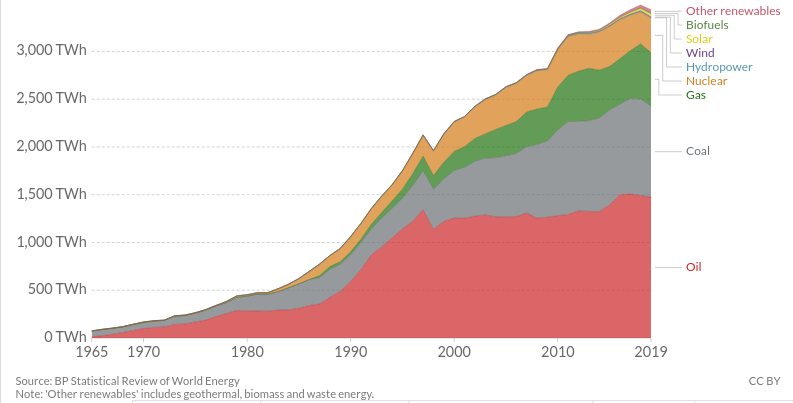

On the other hand, clearly Brazil produces energy from these sources but hydroelectric energy occupies a large percentage (along with other renewable energies). **Both data come from Energy Consumption by source**

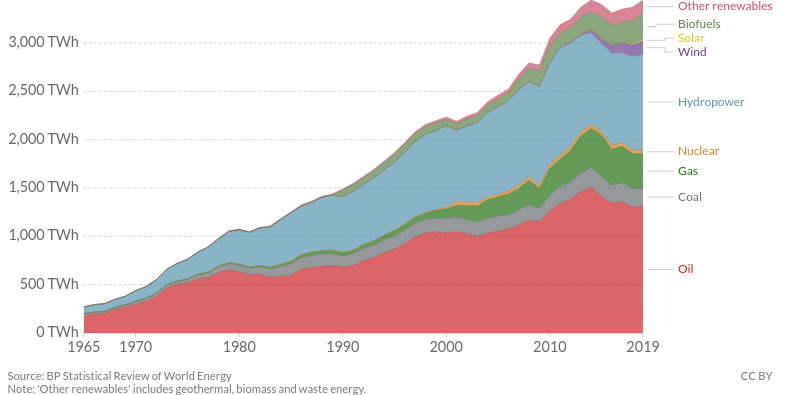


In [22]:
# We are going to add some columns that would be interesting to have in our df 
# Let's do some simple calculations 

# Population by country estimates using energy supply and energy per capita:
df['Population'] = df['Energy Supply'] / df['Energy Supply per Capita']
df.sort_values(by='Population',ascending=False)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Population
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,1.367645e+09
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,1.276731e+09
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,3.176154e+08
Brazil,15,8668,8596,60702,14396,7.00,86,1.214900e+10,59.0,69.648030,1.845080e+12,1.957118e+12,2.056809e+12,2.054215e+12,2.208872e+12,2.295245e+12,2.339209e+12,2.409740e+12,2.412231e+12,2.319423e+12,2.059153e+08
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,1.435000e+08
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,1.274094e+08
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,8.036970e+07
Iran,13,8896,8819,57470,19125,6.46,72,9.172000e+09,119.0,5.707721,3.895523e+11,4.250646e+11,4.289909e+11,4.389208e+11,4.677902e+11,4.853309e+11,4.532569e+11,4.445926e+11,4.639027e+11,NaN,7.707563e+07
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,6.387097e+07
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,6.383735e+07


Clearly, if a country produces more energy than that consumed per capita, that is, it has greater energy capacity than demanded, in our estimate it will have a "larger population." We see that China, India, the United States and Brazil are ours the countries with the largest population 

In [23]:
# Let's see which country has the highest ratio of self citations to total citations 
df['Self/total Citations ratio']=df['Self-citations']/(df['Citations'])
max_ratio=df['Self/total Citations ratio'].max()
country_name=df[df['Self/total Citations ratio'] == max_ratio].index[0]
(country_name, max_ratio)

('China', 0.6893126179389422)

In [29]:
# Let's see the behavior by continent. We will group the countries according to their continents 
ContinentDict  = {'China':'Asia', 
              'United States':'North America', 
              'Japan':'Asia', 
              'United Kingdom':'Europe', 
              'Russian Federation':'Europe', 
              'Canada':'North America', 
              'Germany':'Europe', 
              'India':'Asia',
              'France':'Europe', 
              'South Korea':'Asia', 
              'Italy':'Europe', 
              'Spain':'Europe', 
              'Iran':'Asia',
              'Australia':'Australia', 
              'Brazil':'South America'}
df['Continent']=df.index.map(ContinentDict)

new_df = pd.DataFrame({'size': df.groupby('Continent').count()['Rank'],
                    'sum': df.groupby('Continent').sum()['Population'],
                    'mean': df.groupby('Continent').mean()['Population'],
                    'std': df.groupby('Continent').std()['Population']})
new_df

,size,sum,mean,std
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN
